In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import PolynomialFeatures

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



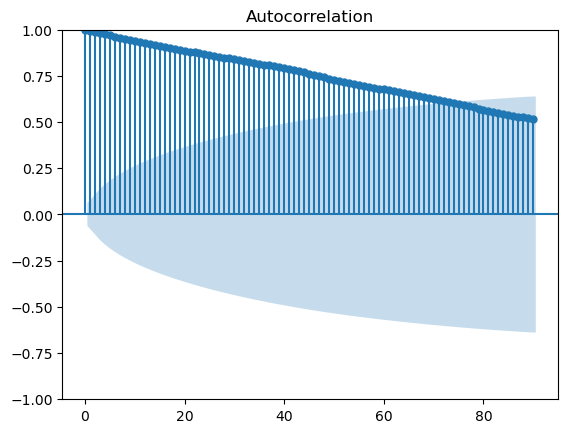

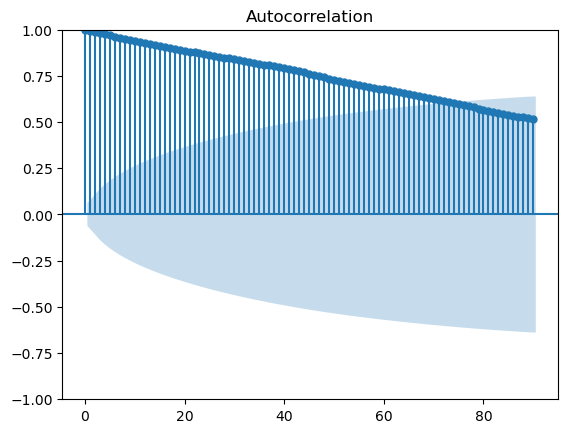

In [19]:
plot_acf(df.mid_price, lags=90)


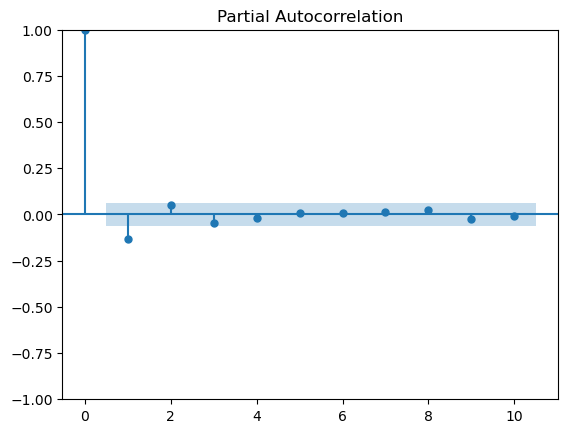

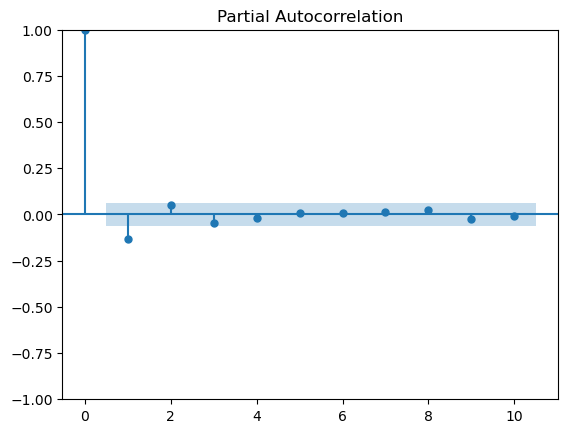

In [107]:
plot_pacf(df.mid_price.diff().dropna(), lags=10)


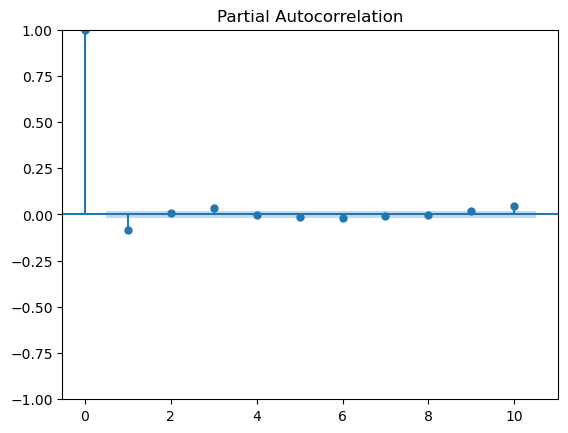

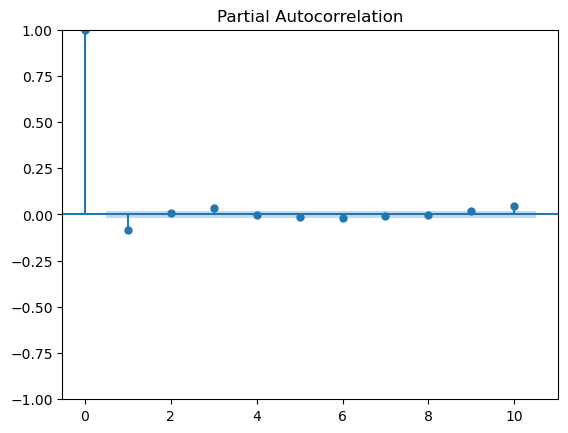

In [112]:
plot_pacf(df_1_squink.mid_price.pct_change().dropna(), lags = 10)

In [7]:
df = pd.read_excel('squink.xlsx')

In [22]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0
1,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0
2,1,200,SQUID_INK,1832,22,NaN,NaN,NaN,NaN,1835,22,NaN,NaN,NaN,NaN,1833.5,0
3,1,300,SQUID_INK,1836,1,1834.0,26.0,NaN,NaN,1837,26,NaN,NaN,NaN,NaN,1836.5,0
4,1,400,SQUID_INK,1833,28,NaN,NaN,NaN,NaN,1836,28,NaN,NaN,NaN,NaN,1834.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,99500,SQUID_INK,1814,20,NaN,NaN,NaN,NaN,1818,20,NaN,NaN,NaN,NaN,1816.0,0
996,1,99600,SQUID_INK,1815,28,NaN,NaN,NaN,NaN,1818,28,NaN,NaN,NaN,NaN,1816.5,0
997,1,99700,SQUID_INK,1813,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.0,0
998,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,0


<Axes: >

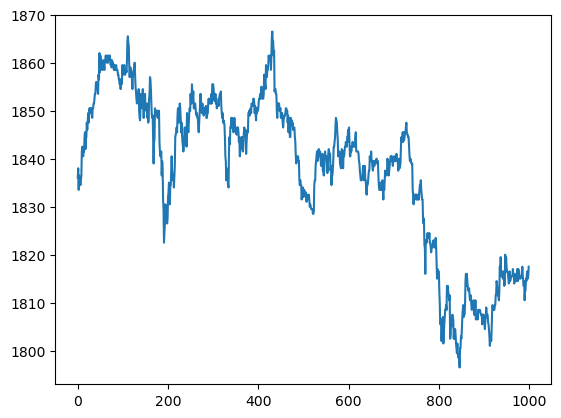

In [21]:
df.mid_price.plot()

In [9]:
imbalance = []
for i in range(len(df)):
    imbal = 0
    for j in range(1,4):
        col_bid = 'bid_price_' + str(j)
        vol_bid = 'bid_volume_' + str(j)
        col_ask = 'ask_price_' + str(j)
        vol_ask = 'ask_volume_' + str(j)

        if np.isnan(df[col_bid].iloc[i]):
            pass
        else:
            imbal += (df[col_bid].iloc[i] - df['mid_price'].iloc[i]) * df[vol_bid].iloc[i]

        if np.isnan(df[col_ask].iloc[i]):
            pass
        else:
            imbal += (df[col_ask].iloc[i] - df['mid_price'].iloc[i]) * df[vol_ask].iloc[i]
        
    imbalance.append(imbal)
imbalance

[0.0,
 -49.0,
 0.0,
 -52.5,
 0.0,
 27.0,
 -62.5,
 23.5,
 51.5,
 0.0,
 0.0,
 0.0,
 1.5,
 0.0,
 49.0,
 -42.5,
 -28.0,
 36.0,
 -50.0,
 94.5,
 0.0,
 59.0,
 -6.0,
 -29.5,
 0.0,
 -21.0,
 0.0,
 -10.5,
 0.0,
 0.0,
 -73.0,
 0.0,
 50.5,
 0.0,
 -27.0,
 0.0,
 0.0,
 0.0,
 51.5,
 -1.5,
 1.5,
 -51.0,
 36.0,
 3.0,
 0.0,
 56.0,
 43.5,
 0.0,
 -61.0,
 52.0,
 -37.5,
 0.0,
 -36.0,
 0.0,
 0.0,
 91.0,
 0.0,
 -34.5,
 0.0,
 0.0,
 0.0,
 0.0,
 -60.5,
 0.0,
 0.0,
 0.0,
 10.5,
 38.0,
 -6.0,
 32.0,
 -41.5,
 0.0,
 -9.0,
 0.0,
 0.0,
 61.0,
 0.0,
 25.0,
 -24.0,
 -22.0,
 -65.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -12.0,
 0.0,
 -38.5,
 0.0,
 -3.0,
 0.0,
 -7.5,
 -4.5,
 0.0,
 -4.5,
 0.0,
 0.0,
 72.0,
 0.0,
 0.0,
 0.0,
 26.0,
 0.0,
 -7.5,
 0.0,
 -12.0,
 -41.5,
 -10.5,
 -29.0,
 27.0,
 29.0,
 -1.5,
 35.0,
 0.0,
 0.0,
 63.0,
 31.0,
 -26.0,
 0.0,
 -27.0,
 0.0,
 0.0,
 0.0,
 -6.0,
 0.0,
 -26.0,
 -30.0,
 0.0,
 -34.0,
 25.0,
 30.0,
 43.0,
 -80.0,
 0.0,
 0.0,
 0.0,
 29.0,
 0.0,
 0.0,
 4.5,
 -31.0,
 0.0,
 0.0,
 0.0,
 1.5,
 33.0,
 57.5,
 26.0,


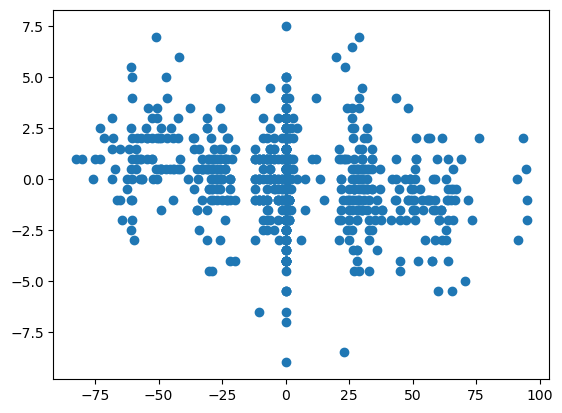

In [16]:
plt.scatter(imbalance, df.mid_price.diff())

# Data from days 1 to 3

In [38]:
df_1 = pd.read_csv('round-1-island-data-bottle/prices_round_1_day_-2.csv', sep = ';')

In [39]:
df_1_squink = df_1[df_1['product'] == "SQUID_INK"]

<Axes: >

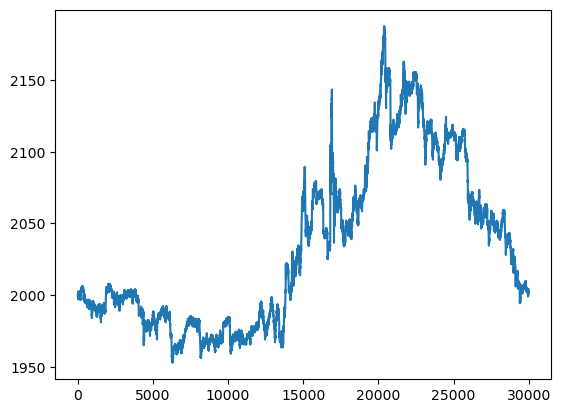

In [40]:
df_1_squink.mid_price.plot()

<Axes: >

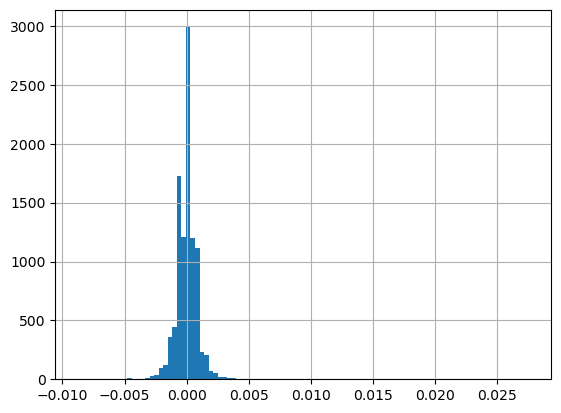

In [41]:
df_1_squink.mid_price.pct_change().hist(bins = 100)

In [114]:
imbalance = []
for i in range(len(df_1_squink)):
    imbal = 0
    for j in range(1,4):
        col_bid = 'bid_price_' + str(j)
        vol_bid = 'bid_volume_' + str(j)
        col_ask = 'ask_price_' + str(j)
        vol_ask = 'ask_volume_' + str(j)

        if np.isnan(df_1_squink[col_bid].iloc[i]):
            pass
        else:
            imbal += 1/(df_1_squink[col_bid].iloc[i] - df_1_squink['mid_price'].iloc[i]) * df_1_squink[vol_bid].iloc[i]

        if np.isnan(df_1_squink[col_ask].iloc[i]):
            pass
        else:
            imbal += 1/(df_1_squink[col_ask].iloc[i] - df_1_squink['mid_price'].iloc[i]) * df_1_squink[vol_ask].iloc[i]
        
    imbalance.append(imbal)
imbalance

[0.0,
 2.0,
 -7.9999999999999964,
 0.0,
 0.0,
 46.0,
 0.0,
 0.0,
 37.42857142857143,
 13.0,
 -4.0,
 -9.0,
 0.0,
 8.5,
 -15.333333333333334,
 6.666666666666668,
 0.0,
 -12.0,
 -15.0,
 39.6,
 -13.5,
 27.2,
 0.0,
 0.0,
 0.0,
 0.0,
 -3.9999999999999982,
 -9.5,
 0.0,
 0.0,
 0.0,
 37.6,
 0.0,
 -4.0,
 4.133333333333331,
 47.6,
 0.0,
 6.666666666666668,
 5.866666666666667,
 -16.333333333333336,
 -2.6666666666666643,
 -13.666666666666668,
 0.6666666666666643,
 0.0,
 -12.5,
 0.0,
 0.0,
 0.0,
 0.0,
 5.866666666666665,
 -30.0,
 0.0,
 0.0,
 -5.866666666666665,
 0.0,
 39.6,
 15.333333333333334,
 -38.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7999999999999972,
 0.0,
 -42.57142857142857,
 0.0,
 0.5,
 2.6666666666666643,
 1.0666666666666664,
 0.0,
 -11.0,
 -34.57142857142857,
 6.933333333333332,
 0.6666666666666643,
 17.666666666666668,
 6.666666666666664,
 0.0,
 0.0,
 13.666666666666668,
 7.733333333333331,
 0.0,
 0.0,
 19.0,
 -1.0,
 0.0,
 -3.7333333333333307,
 0.0,
 3.666666666666667,
 30.0,
 -0.6666666666666643,

In [115]:
df_1_squink['imbalance2'] = imbalance

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_44307/45757175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_squink['imbalance2'] = imbalance


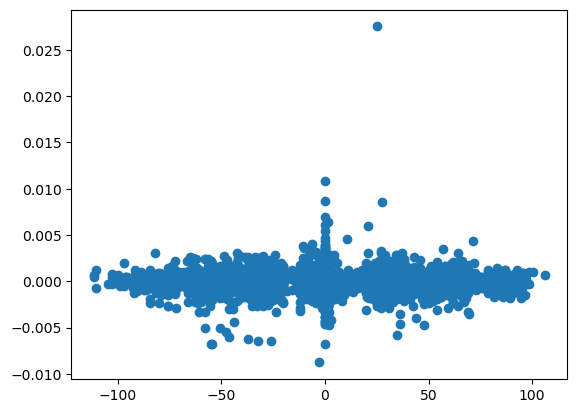

In [67]:
plt.scatter(df_1_squink.imbalance, df_1_squink.mid_price.pct_change().shift(1))

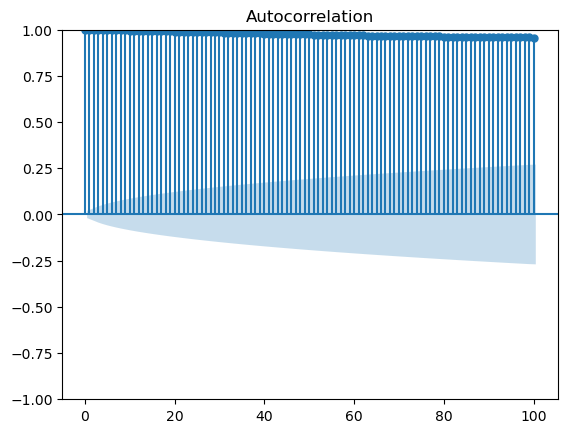

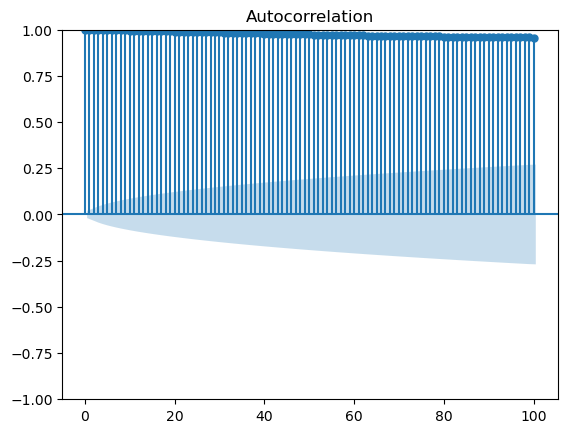

In [52]:
plot_acf(df_1_squink.mid_price, lags = 100)

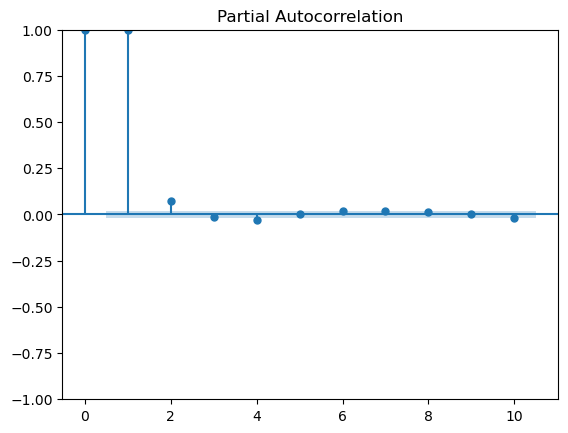

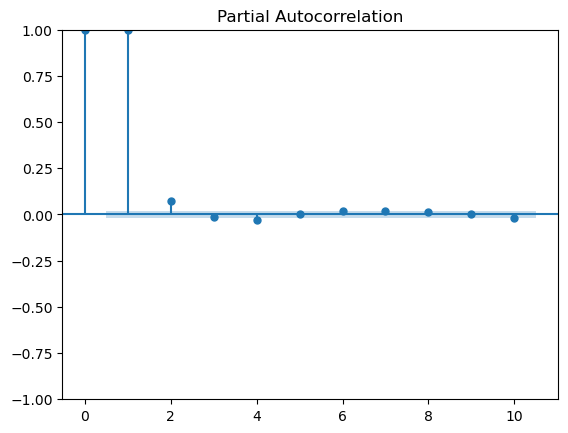

In [55]:
plot_pacf(df_1_squink.mid_price, lags = 10)

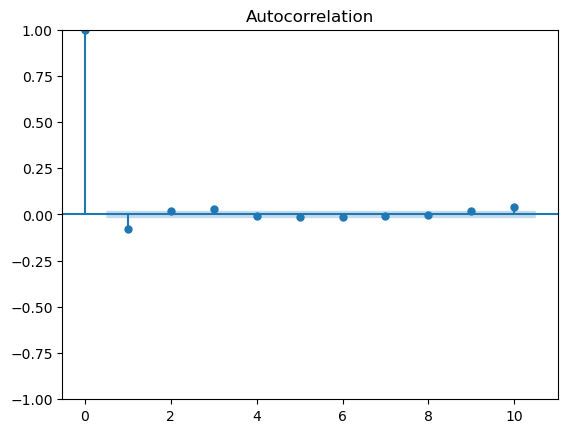

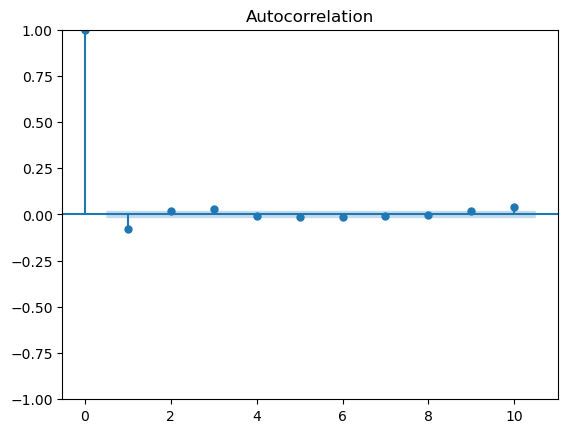

In [62]:
plot_acf(df_1_squink.mid_price.diff().dropna(), lags = 10)

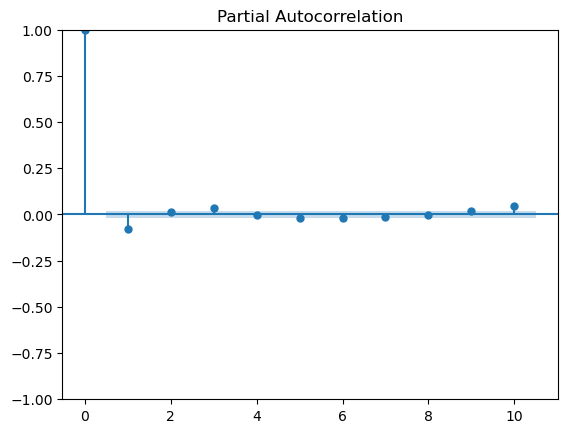

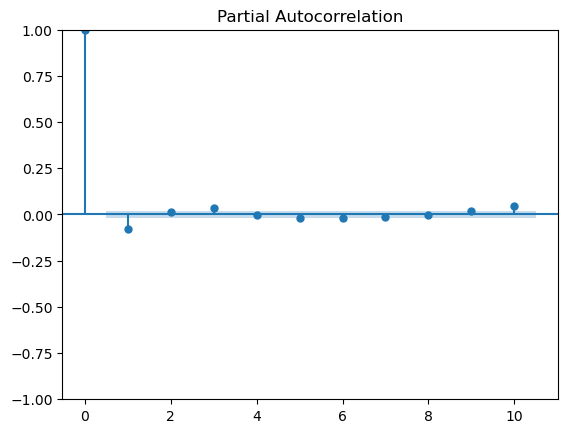

In [78]:
plot_pacf(df_1_squink.mid_price.diff().dropna(), lags = 10)

<Axes: >

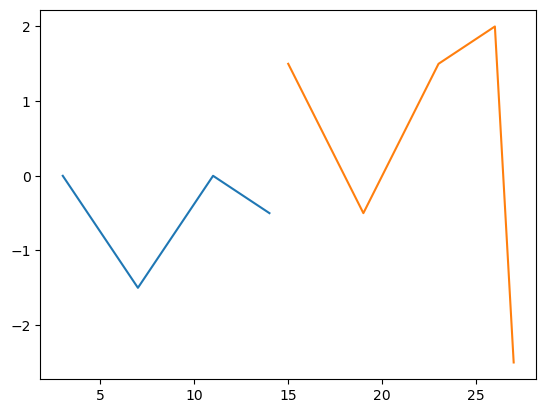

In [77]:
df_1_squink.mid_price.diff()[0:5].plot()
df_1_squink.mid_price.diff()[5:10].plot()

<Axes: >

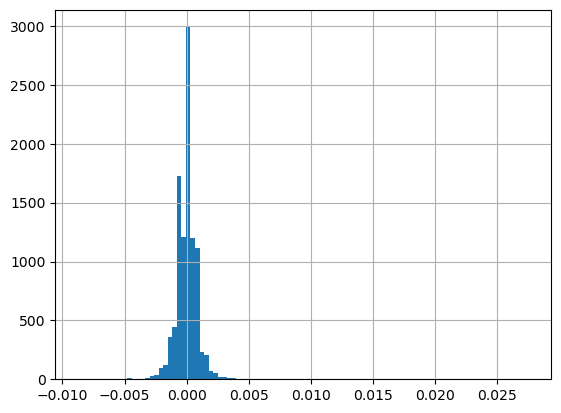

In [65]:
df_1_squink.mid_price.pct_change().hist(bins = 100)

<Axes: >

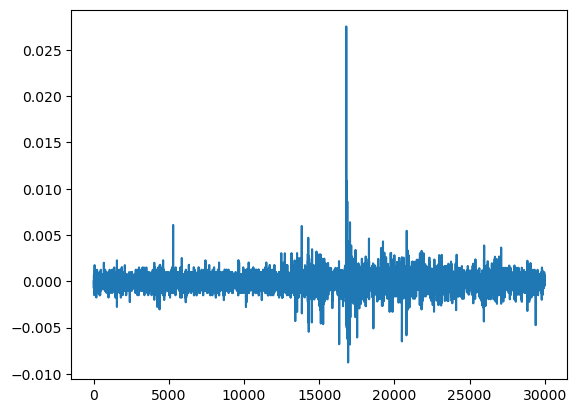

In [82]:
df_1_squink.mid_price.pct_change().plot()

<Axes: >

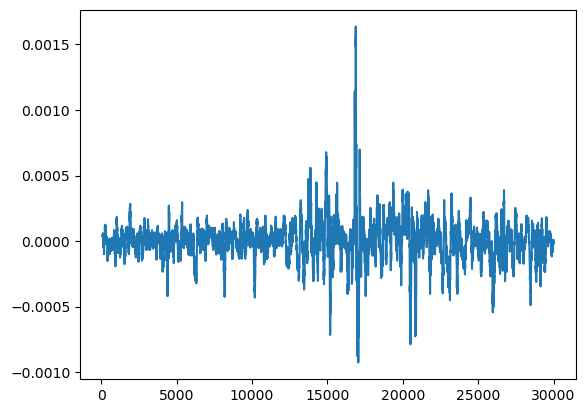

In [83]:
df_1_squink.mid_price.pct_change().rolling(30).mean().plot()

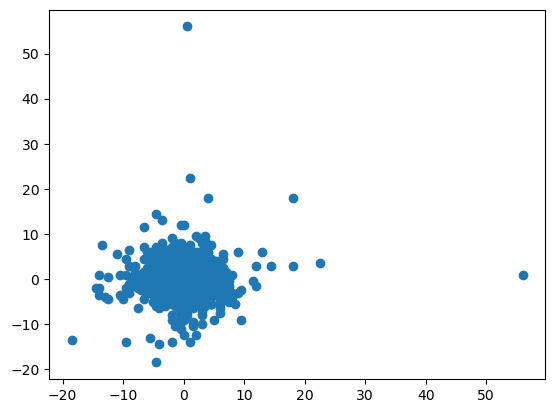

In [92]:
plt.scatter(df_1_squink.mid_price.diff(), df_1_squink.mid_price.diff().shift(-1))

In [93]:
df_1_squink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,imbalance
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,-37.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0,30.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,2003,26,NaN,NaN,NaN,NaN,2001.5,0.0,0.0
29990,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,2004,30,NaN,NaN,NaN,NaN,2002.5,0.0,0.0
29992,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,2005,22,NaN,NaN,NaN,NaN,2003.0,0.0,0.0
29994,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,2004,3,2005.0,26.0,NaN,NaN,2003.0,0.0,29.0


In [95]:
df_1_squink['spread'] = df_1_squink.ask_price_1 - df_1_squink.bid_price_1

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_44307/3888122206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_squink['spread'] = df_1_squink.ask_price_1 - df_1_squink.bid_price_1


<Axes: >

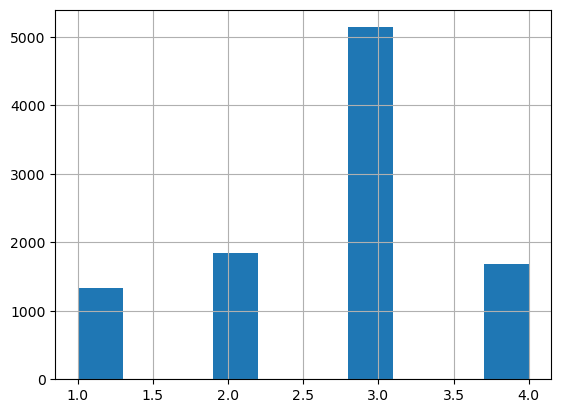

In [98]:
df_1_squink.spread.hist()

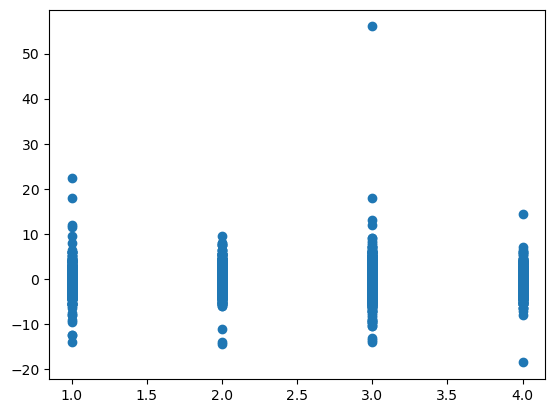

In [100]:
plt.scatter(df_1_squink.spread, df_1_squink.mid_price.diff().shift(-1))

<Axes: >

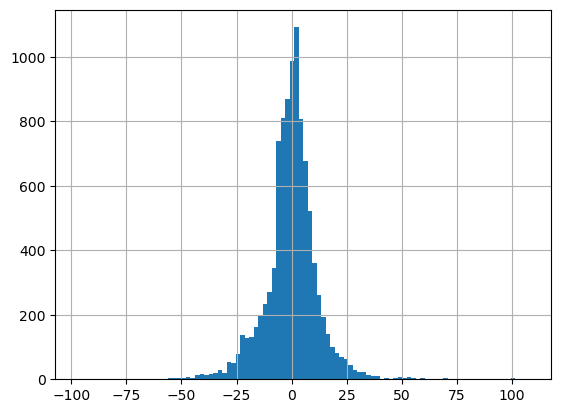

In [104]:
df_1_squink.mid_price.diff(50).hist(bins = 100)

## Redo

In [117]:
df_1_squink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,imbalance,spread,imbalance2
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,0.0,4,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,-37.0,2,2.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0,30.0,3,-8.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,0.0,3,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0,0.0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,2003,26,NaN,NaN,NaN,NaN,2001.5,0.0,0.0,3,0.0
29990,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,2004,30,NaN,NaN,NaN,NaN,2002.5,0.0,0.0,3,0.0
29992,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,2005,22,NaN,NaN,NaN,NaN,2003.0,0.0,0.0,4,0.0
29994,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,2004,3,2005.0,26.0,NaN,NaN,2003.0,0.0,29.0,2,-10.0


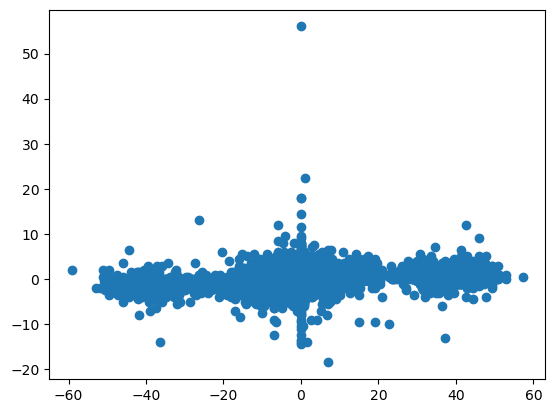

In [125]:
plt.scatter(df_1_squink.imbalance2, df_1_squink.mid_price.diff())

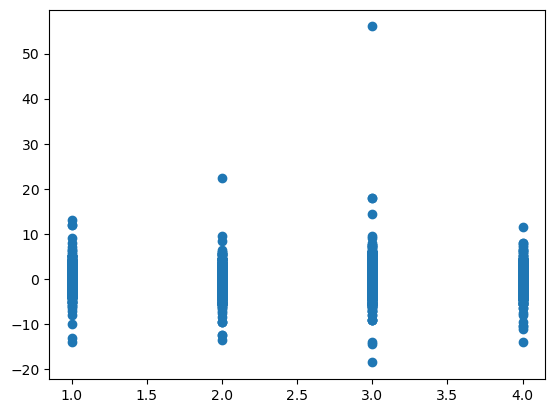

In [126]:
plt.scatter(df_1_squink.spread, df_1_squink.mid_price.diff())

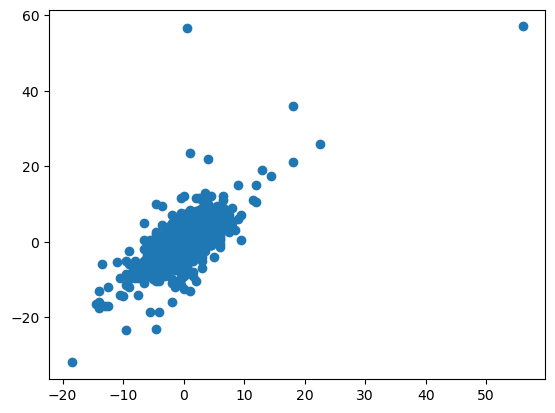

In [139]:
plt.scatter(df_1_squink.mid_price.diff(), df_1_squink.mid_price.diff(2).shift(-1))

In [135]:
df_1_squink.mid_price.diff()

2        NaN
3        0.0
7       -1.5
11       0.0
14      -0.5
        ... 
29986   -1.0
29990    1.0
29992    0.5
29994    0.0
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

In [136]:
df_1_squink.mid_price.diff(2)

2        NaN
3        NaN
7       -1.5
11      -1.5
14      -0.5
        ... 
29986    0.5
29990    0.0
29992    1.5
29994    0.5
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

In [137]:
df_1_squink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,imbalance,spread,imbalance2
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0,0.0,4,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0,-37.0,2,2.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0,30.0,3,-8.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0,0.0,3,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0,0.0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,2003,26,NaN,NaN,NaN,NaN,2001.5,0.0,0.0,3,0.0
29990,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,2004,30,NaN,NaN,NaN,NaN,2002.5,0.0,0.0,3,0.0
29992,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,2005,22,NaN,NaN,NaN,NaN,2003.0,0.0,0.0,4,0.0
29994,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,2004,3,2005.0,26.0,NaN,NaN,2003.0,0.0,29.0,2,-10.0


In [142]:
df_1_squink.mid_price.diff()

2        NaN
3        0.0
7       -1.5
11       0.0
14      -0.5
        ... 
29986   -1.0
29990    1.0
29992    0.5
29994    0.0
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

In [143]:
df_1_squink.mid_price.diff().shift(-1)

2        0.0
3       -1.5
7        0.0
11      -0.5
14       1.5
        ... 
29986    1.0
29990    0.5
29992    0.0
29994    1.0
29999    NaN
Name: mid_price, Length: 10000, dtype: float64

In [146]:
df_1_squink.mid_price.diff(2)

2        NaN
3        NaN
7       -1.5
11      -1.5
14      -0.5
        ... 
29986    0.5
29990    0.0
29992    1.5
29994    0.5
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

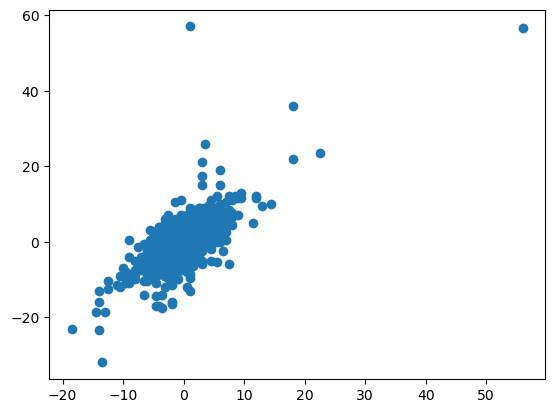

In [147]:
plt.scatter(df_1_squink.mid_price.diff(), df_1_squink.mid_price.diff(2))

In [148]:
df_1_squink.mid_price.diff()

2        NaN
3        0.0
7       -1.5
11       0.0
14      -0.5
        ... 
29986   -1.0
29990    1.0
29992    0.5
29994    0.0
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

In [149]:
df_1_squink.mid_price.diff(2)

2        NaN
3        NaN
7       -1.5
11      -1.5
14      -0.5
        ... 
29986    0.5
29990    0.0
29992    1.5
29994    0.5
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

In [150]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_1_squink.mid_price

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -1.69345814550217
p-value: 0.4344861500294813
Critical Values:
   1%: -3.4310062641674843
   5%: -2.8618300296182304
   10%: -2.56692437762918
Fail to reject the null hypothesis — likely non-stationary.


In [152]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_1_squink.mid_price.diff().dropna()

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -16.204103798078254
p-value: 4.048970100592767e-29
Critical Values:
   1%: -3.4310062641674843
   5%: -2.8618300296182304
   10%: -2.56692437762918
Reject the null hypothesis — likely stationary.


In [255]:
df_2_squink = pd.read_csv('round-1-island-data-bottle/prices_round_1_day_-1.csv', sep = ';')
df_2_squink = df_2_squink[df_2_squink['product'] == 'SQUID_INK']
df_2_squink['log_returns'] = np.log(df_2_squink['mid_price'] / df_2_squink['mid_price'].shift(1))

df_3_squink = pd.read_csv('round-1-island-data-bottle/prices_round_1_day_0.csv', sep = ';')
df_3_squink = df_3_squink[df_3_squink['product'] == 'SQUID_INK']
df_3_squink['log_returns'] = np.log(df_3_squink['mid_price'] / df_3_squink['mid_price'].shift(1))
df_3_squink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,log_returns
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0,NaN
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0,0.000254
6,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0,-0.001270
9,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0,-0.000508
14,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0,0.000546
29989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0,0.000819
29993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0,0.000818
29994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0,0.001906


In [256]:
df_2_squink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,log_returns
0,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0,NaN
5,-1,100,SQUID_INK,2004,24,NaN,NaN,NaN,NaN,2007,24,NaN,NaN,NaN,NaN,2005.5,0.0,0.000000
8,-1,200,SQUID_INK,2003,22,NaN,NaN,NaN,NaN,2006,20,NaN,NaN,NaN,NaN,2004.5,0.0,-0.000499
9,-1,300,SQUID_INK,2003,31,NaN,NaN,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2004.5,0.0,0.000000
12,-1,400,SQUID_INK,2004,27,NaN,NaN,NaN,NaN,2007,27,NaN,NaN,NaN,NaN,2005.5,0.0,0.000499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,-1,999500,SQUID_INK,1971,5,1970.0,31.0,NaN,NaN,1972,6,1973.0,31.0,NaN,NaN,1971.5,0.0,0.000507
29989,-1,999600,SQUID_INK,1972,5,1971.0,30.0,NaN,NaN,1974,30,NaN,NaN,NaN,NaN,1973.0,0.0,0.000761
29992,-1,999700,SQUID_INK,1971,26,NaN,NaN,NaN,NaN,1974,26,NaN,NaN,NaN,NaN,1972.5,0.0,-0.000253
29996,-1,999800,SQUID_INK,1972,20,NaN,NaN,NaN,NaN,1975,20,NaN,NaN,NaN,NaN,1973.5,0.0,0.000507


In [257]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_2_squink.mid_price.pct_change().dropna()

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -17.30968394662288
p-value: 5.564185562995392e-30
Critical Values:
   1%: -3.4310067255162737
   5%: -2.86183023348434
   10%: -2.5669244861474008
Reject the null hypothesis — likely stationary.


In [258]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_2_squink.mid_price.diff().dropna()

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -17.355376651224457
p-value: 5.241631759678176e-30
Critical Values:
   1%: -3.4310067255162737
   5%: -2.86183023348434
   10%: -2.5669244861474008
Reject the null hypothesis — likely stationary.


In [259]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_3_squink.mid_price

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -1.2672896671965213
p-value: 0.6440013533668529
Critical Values:
   1%: -3.4310046217713728
   5%: -2.861829303857089
   10%: -2.5669239913055346
Fail to reject the null hypothesis — likely non-stationary.


In [260]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_3_squink.mid_price.diff().dropna()

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -35.672189774775276
p-value: 0.0
Critical Values:
   1%: -3.4310046217713728
   5%: -2.861829303857089
   10%: -2.5669239913055346
Reject the null hypothesis — likely stationary.


In [261]:
df_1_squink['log_returns'] = np.log(df_1_squink['mid_price'] / df_1_squink['mid_price'].shift(1))
df_1_squink

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_44307/1541604127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_squink['log_returns'] = np.log(df_1_squink['mid_price'] / df_1_squink['mid_price'].shift(1))


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,imbalance,spread,imbalance2,log_returns
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,...,NaN,NaN,NaN,NaN,2000.0,0.0,0.0,4,0.0,NaN
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,...,NaN,NaN,NaN,NaN,2000.0,0.0,-37.0,2,2.0,0.000000
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,...,2001.0,30.0,NaN,NaN,1998.5,0.0,30.0,3,-8.0,-0.000750
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,NaN,NaN,1998.5,0.0,0.0,3,0.0,0.000000
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,NaN,NaN,1998.0,0.0,0.0,4,0.0,-0.000250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,2003,...,NaN,NaN,NaN,NaN,2001.5,0.0,0.0,3,0.0,-0.000500
29990,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,2004,...,NaN,NaN,NaN,NaN,2002.5,0.0,0.0,3,0.0,0.000500
29992,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,2005,...,NaN,NaN,NaN,NaN,2003.0,0.0,0.0,4,0.0,0.000250
29994,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,2004,...,2005.0,26.0,NaN,NaN,2003.0,0.0,29.0,2,-10.0,0.000000


In [262]:
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = df_1_squink['log_returns'].dropna()

# Perform ADF test
result = adfuller(data)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Optional: Interpret the result
if result[1] <= 0.05:
    print("Reject the null hypothesis — likely stationary.")
else:
    print("Fail to reject the null hypothesis — likely non-stationary.")

ADF Statistic: -16.23512443642311
p-value: 3.776745256661793e-29
Critical Values:
   1%: -3.431006198313423
   5%: -2.861830000517878
   10%: -2.5669243621390216
Reject the null hypothesis — likely stationary.


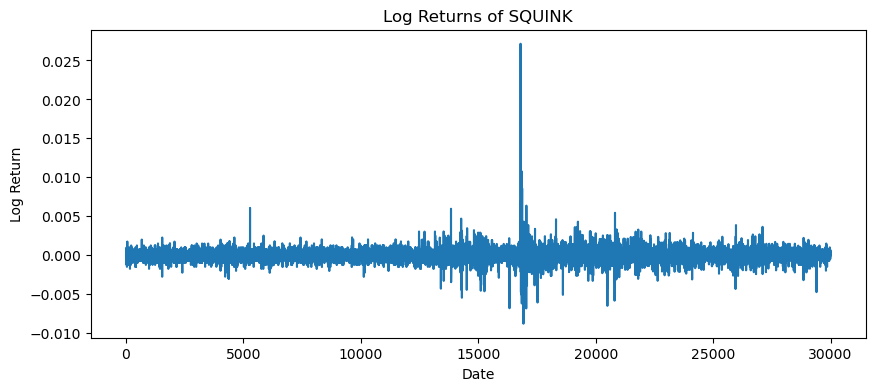

In [263]:
plt.figure(figsize=(10, 4))
plt.plot(df_1_squink.index, df_1_squink['log_returns'])
plt.title('Log Returns of SQUINK')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()


ADF Statistic: -16.23512443642311
p-value: 3.776745256661793e-29
Critical Values: {'1%': -3.431006198313423, '5%': -2.861830000517878, '10%': -2.5669243621390216}
✅ Returns are stationary


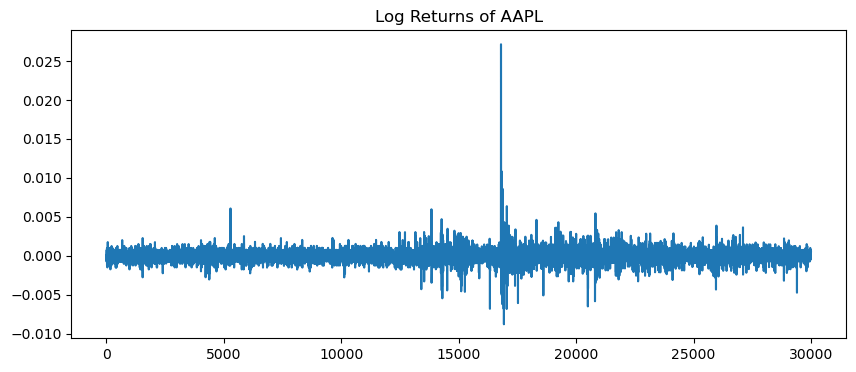

In [264]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


data = df_1_squink

# Step 2: ADF Test
adf_result = adfuller(data['log_returns'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

if adf_result[1] <= 0.05:
    print("✅ Returns are stationary")
else:
    print("❌ Returns are not stationary")

# Step 3: Plot returns
data['log_returns'].plot(title='Log Returns of AAPL', figsize=(10, 4))
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

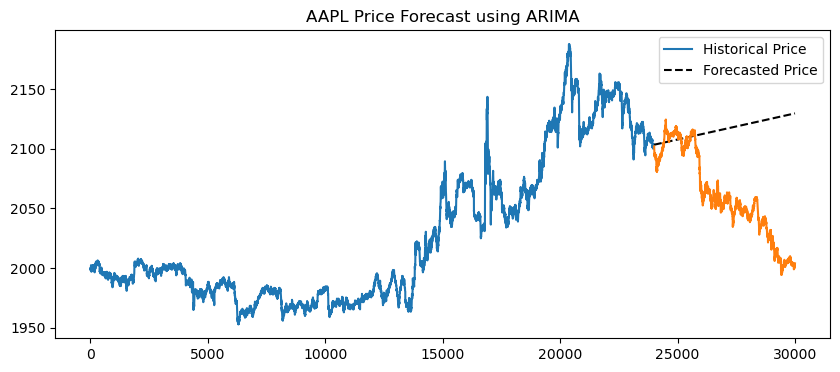

In [265]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit ARIMA model to log returns


data = df_1_squink
train = data[0:8000]
test = data[8000:]


model = ARIMA(train['log_returns'], order=(1, 0, 1))  # Simple ARIMA(1,0,1)

model_fit = model.fit()

# Step 2: Forecast future returns
forecast_steps = len(test)  # Forecast next 30 days
forecast_returns = model_fit.forecast(steps=forecast_steps)

forecast_returns.index = np.arange(0, forecast_steps)
forecast_returns

# Step 3: Convert forecasted returns back to price
last_price = train['mid_price'].iloc[-1]
forecast_prices = [last_price * np.exp(forecast_returns.cumsum())[i] for i in range(len(forecast_returns))]

# Step 4: Plot
plt.figure(figsize=(10, 4))
plt.plot(train.index, train['mid_price'], label='Historical Price')
plt.plot(test.index, forecast_prices, label='Forecasted Price', linestyle='--', color = 'Black')
plt.plot(test.index, test.mid_price)
plt.legend()
plt.title('AAPL Price Forecast using ARIMA')
plt.show()


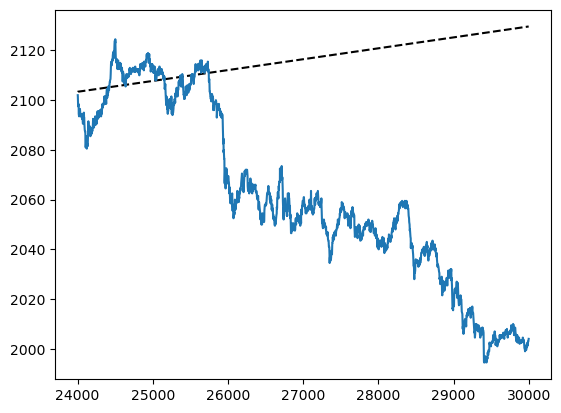

In [266]:
plt.plot(test.index, forecast_prices, label='Forecasted Price', linestyle='--', color = 'Black')
plt.plot(test.index, test.mid_price)

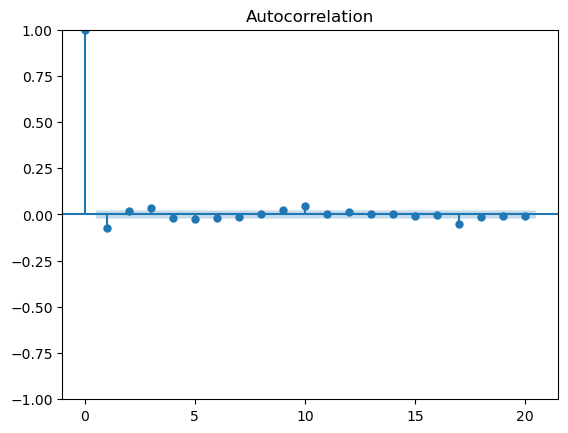

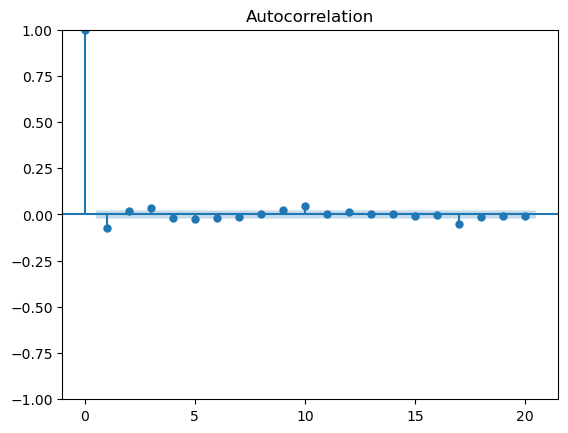

In [267]:
plot_acf(train['log_returns'].dropna(), lags = 20)

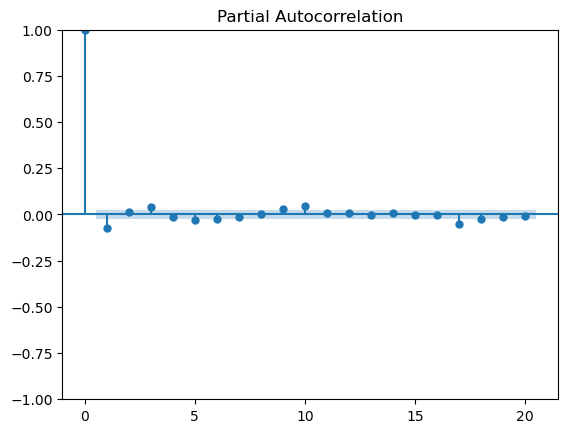

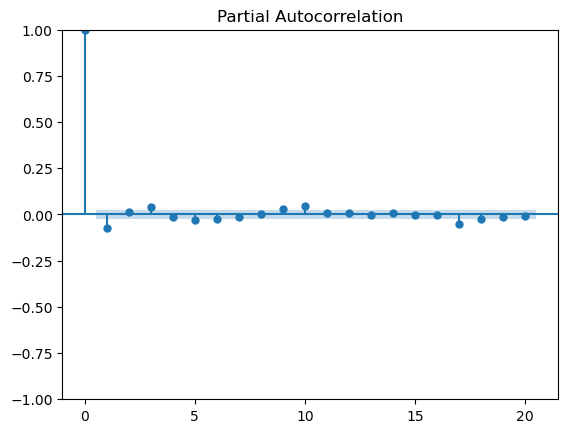

In [268]:
plot_pacf(train['log_returns'].dropna(), lags = 20)

In [269]:
print(model_fit.summary())

# Step 4: Access coefficients directly
params = model_fit.params
print("\nModel Coefficients:")
print(params)

# Access specific terms
phi = params.get('ar.L1', None)   # AR term
theta = params.get('ma.L1', None) # MA term
const = params.get('const', None) # Constant term

print(f"\nAR(1) coefficient: {phi}")
print(f"MA(1) coefficient: {theta}")
print(f"Constant term: {const}")

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                 8000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               44458.687
Date:                Wed, 09 Apr 2025   AIC                         -88909.374
Time:                        20:56:05   BIC                         -88881.425
Sample:                             0   HQIC                        -88899.807
                               - 8000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.205e-06   1.03e-05      0.604      0.546   -1.39e-05    2.64e-05
ar.L1         -0.1433      0.003    -54.056      0.000      -0.148      -0.138
ma.L1          0.0713      0.003     26.623      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

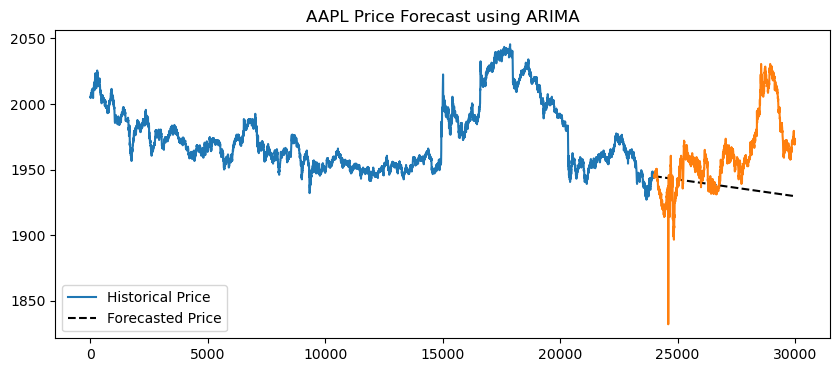

In [270]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit ARIMA model to log returns


data = df_2_squink
train = data[0:8000]
test = data[8000:]


model = ARIMA(train['log_returns'], order=(1, 0, 1))  # Simple ARIMA(1,0,1)

model_fit = model.fit()

# Step 2: Forecast future returns
forecast_steps = len(test)  # Forecast next 30 days
forecast_returns = model_fit.forecast(steps=forecast_steps)

forecast_returns.index = np.arange(0, forecast_steps)
forecast_returns

# Step 3: Convert forecasted returns back to price
last_price = train['mid_price'].iloc[-1]
forecast_prices = [last_price * np.exp(forecast_returns.cumsum())[i] for i in range(len(forecast_returns))]

# Step 4: Plot
plt.figure(figsize=(10, 4))
plt.plot(train.index, train['mid_price'], label='Historical Price')
plt.plot(test.index, forecast_prices, label='Forecasted Price', linestyle='--', color = 'Black')
plt.plot(test.index, test.mid_price)
plt.legend()
plt.title('AAPL Price Forecast using ARIMA')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be

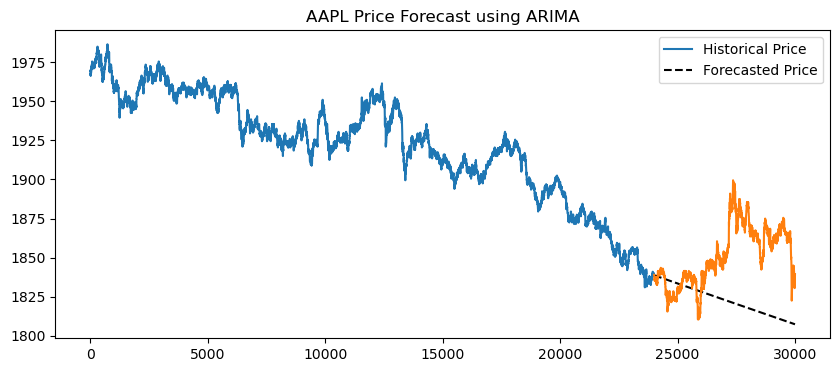

In [271]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Fit ARIMA model to log returns


data = df_3_squink
train = data[0:8000]
test = data[8000:]


model = ARIMA(train['log_returns'], order=(1, 0, 1))  # Simple ARIMA(1,0,1)

model_fit = model.fit()

# Step 2: Forecast future returns
forecast_steps = len(test)  # Forecast next 30 days
forecast_returns = model_fit.forecast(steps=forecast_steps)

forecast_returns.index = np.arange(0, forecast_steps)
forecast_returns

# Step 3: Convert forecasted returns back to price
last_price = train['mid_price'].iloc[-1]
forecast_prices = [last_price * np.exp(forecast_returns.cumsum())[i] for i in range(len(forecast_returns))]

# Step 4: Plot
plt.figure(figsize=(10, 4))
plt.plot(train.index, train['mid_price'], label='Historical Price')
plt.plot(test.index, forecast_prices, label='Forecasted Price', linestyle='--', color = 'Black')
plt.plot(test.index, test.mid_price)
plt.legend()
plt.title('AAPL Price Forecast using ARIMA')
plt.show()


# Restart Squink

## Backtest  
Z-score and non z-score version. Log returns, and also difference from rolling mid.

<Axes: >

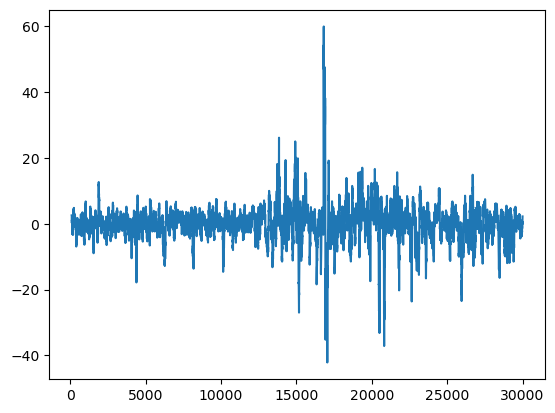

In [380]:
((df_1_squink.mid_price - df_1_squink.mid_price.rolling(30).mean())).plot()

In [340]:
rolling_window = 500
df_1_squink[f'mid_price_z_{rolling_window}'] = ((df_1_squink.mid_price - df_1_squink.mid_price.rolling(rolling_window).mean())/df_1_squink.mid_price.rolling(rolling_window).std())

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_44307/3971744409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_squink[f'mid_price_z_{rolling_window}'] = ((df_1_squink.mid_price - df_1_squink.mid_price.rolling(rolling_window).mean())/df_1_squink.mid_price.rolling(rolling_window).std())


<Axes: >

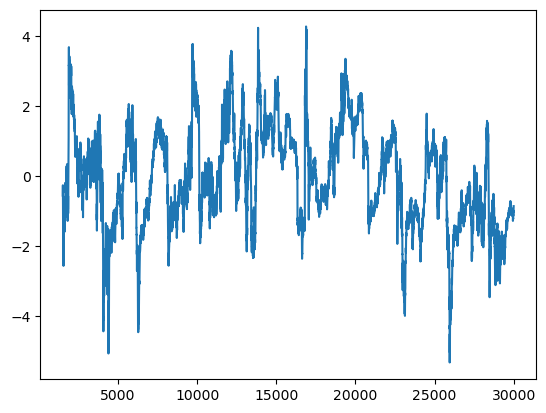

In [341]:
df_1_squink.mid_price_z_500.plot()

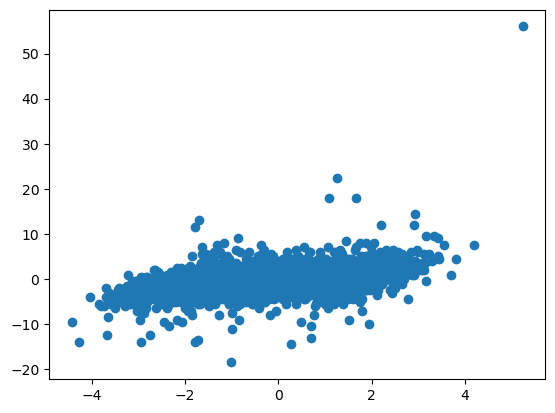

In [332]:
plt.scatter(df_1_squink.mid_price_z_30, df_1_squink.mid_price.diff())

In [304]:
df_1_squink.mid_price_z_30

2             NaN
3             NaN
7             NaN
11            NaN
14            NaN
           ...   
29986   -0.151111
29990    0.453334
29992    0.755557
29994    0.740869
29999    1.315496
Name: mid_price_z_30, Length: 10000, dtype: float64

In [305]:
df_1_squink.mid_price.diff()

2        NaN
3        0.0
7       -1.5
11       0.0
14      -0.5
        ... 
29986   -1.0
29990    1.0
29992    0.5
29994    0.0
29999    1.0
Name: mid_price, Length: 10000, dtype: float64

<Axes: >

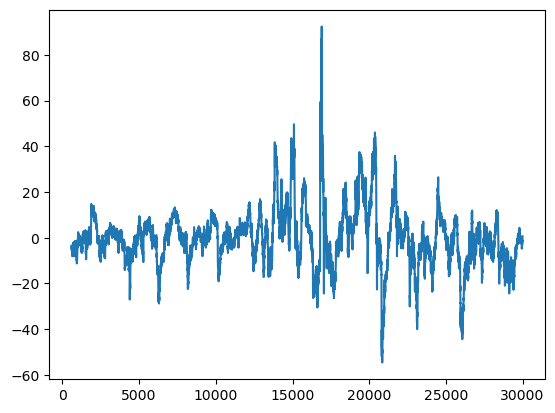

In [283]:
((df_1_squink.mid_price - df_1_squink.mid_price.rolling(200).mean())).plot()

<Axes: >

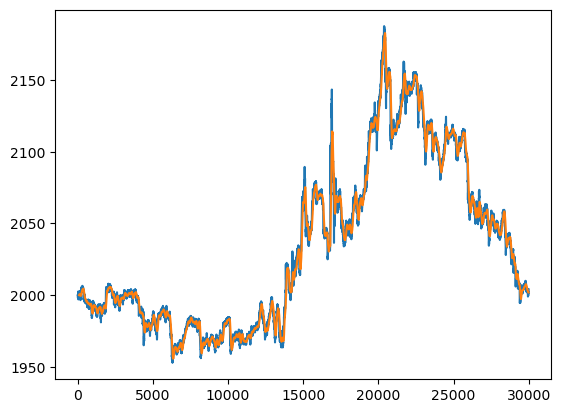

In [465]:
df_1_squink.mid_price.plot()
(df_1_squink.mid_price.rolling(30).mean()).plot()


<Axes: >

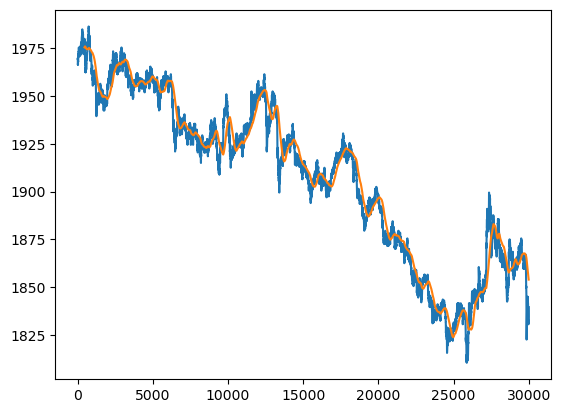

In [477]:
df_3_squink.mid_price.plot()
(df_3_squink.mid_price.rolling(150).mean()).plot()


In [494]:
df_1_squink['rolling_200'] = df_1_squink.mid_price.rolling(200).mean()

/var/folders/kh/zfkqn0cd0cq_vmxgs85vv4qc0000gn/T/ipykernel_44307/2510416017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_squink['rolling_200'] = df_1_squink.mid_price.rolling(200).mean()


<Axes: >

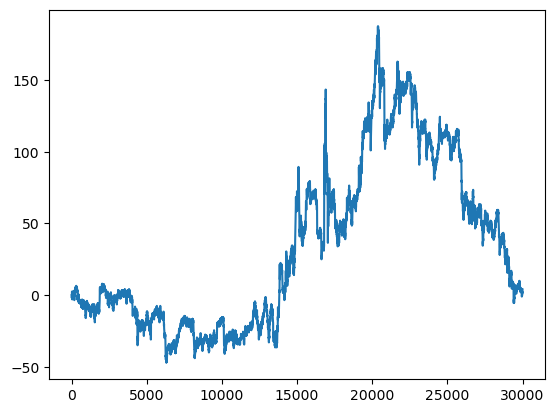

In [499]:
(df_1_squink['mid_price'].diff()).cumsum().plot()


<Axes: >

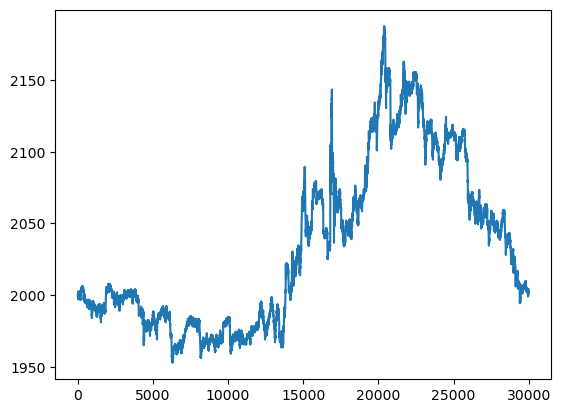

In [496]:
df_1_squink.mid_price.plot()

<Axes: >

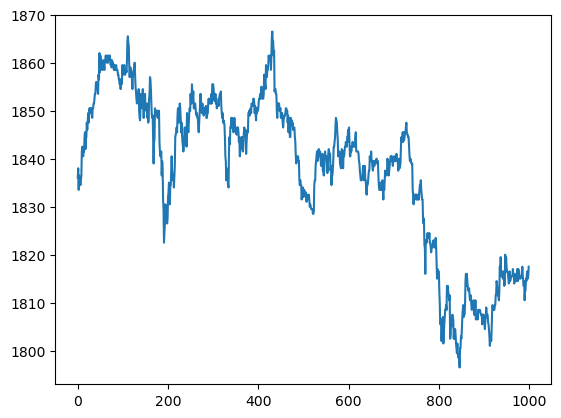

In [493]:
df.mid_price.plot()

<Axes: >

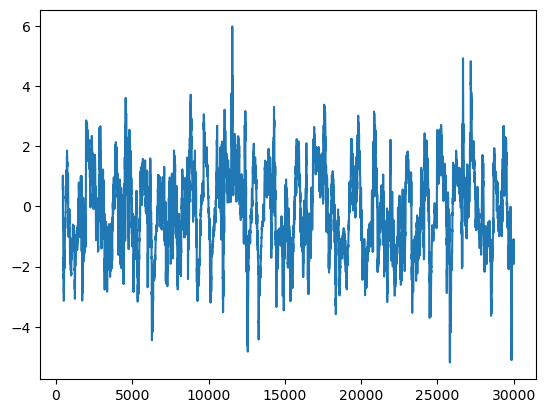

In [504]:
((df_3_squink.mid_price - df_3_squink.mid_price.rolling(150).mean())/df_3_squink.mid_price.rolling(150).std()).plot()


<Axes: >

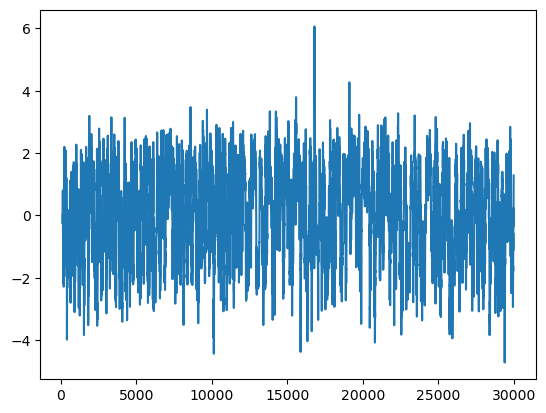

In [503]:
((df_1_squink.mid_price - df_1_squink.mid_price.rolling(40).mean())/df_1_squink.mid_price.rolling(40).std()).plot()


In [469]:
df_1_squink_lr = df_1_squink['log_returns']

<Axes: >

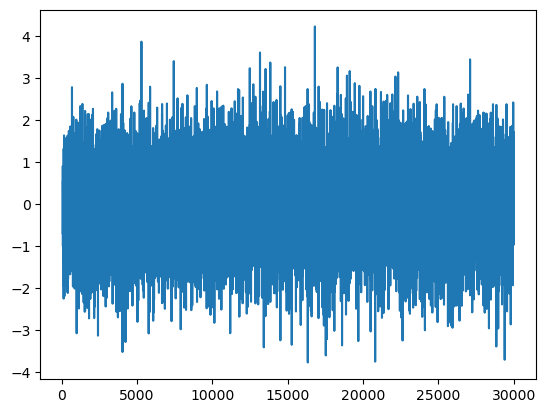

In [472]:
((df_1_squink_lr - df_1_squink_lr.rolling(20).mean())/df_1_squink_lr.rolling(20).std()).plot()


In [467]:
6.8/10*30000

20399.999999999996

###### df_1_squink

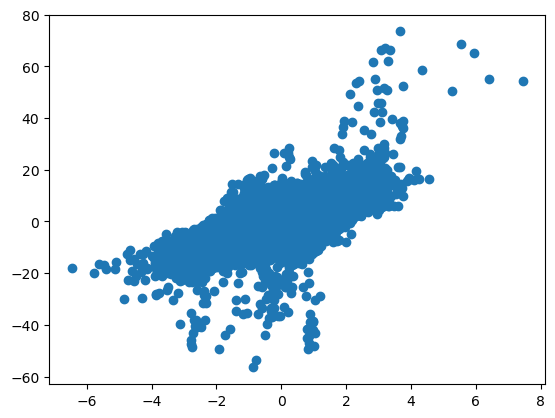

In [432]:
plt.scatter(((df_1_squink.mid_price - df_1_squink.mid_price.rolling(150).mean())/df_1_squink.mid_price.rolling(150).std()), df_1_squink.mid_price.diff(20))

In [416]:
df_1_squink.mid_price.diff(20).head(50)

2      NaN
3      NaN
7      NaN
11     NaN
14     NaN
15     NaN
19     NaN
23     NaN
26     NaN
27     NaN
31     NaN
35     NaN
38     NaN
39     NaN
43     NaN
47     NaN
50     NaN
51     NaN
55     NaN
59     NaN
62     0.0
64     1.5
66     2.0
71     1.0
74     2.5
76     1.5
78     2.5
83     0.5
86    -1.0
88     2.5
90     2.5
95     2.5
98     0.5
100    0.5
102    4.5
107    3.0
110    3.0
112    2.5
114    4.5
119   -1.5
122    1.5
124   -1.5
126    0.0
131    1.0
134   -1.5
136   -1.5
138   -1.5
143   -3.5
146   -2.0
148   -4.0
Name: mid_price, dtype: float64

In [418]:
df_1_squink.mid_price.head(50)

2      2000.0
3      2000.0
7      1998.5
11     1998.5
14     1998.0
15     1999.5
19     1999.0
23     2000.5
26     2002.5
27     2000.0
31     2000.0
35     2000.0
38     2000.0
39     2000.0
43     1997.0
47     1998.5
50     1999.0
51     1999.0
55     1998.0
59     2001.5
62     2000.0
64     2001.5
66     2000.5
71     1999.5
74     2000.5
76     2001.0
78     2001.5
83     2001.0
86     2001.5
88     2002.5
90     2002.5
95     2002.5
98     2000.5
100    2000.5
102    2001.5
107    2001.5
110    2002.0
112    2001.5
114    2002.5
119    2000.0
122    2001.5
124    2000.0
126    2000.5
131    2000.5
134    1999.0
136    1999.5
138    2000.0
143    1997.5
146    1999.5
148    1998.5
Name: mid_price, dtype: float64

<Axes: >

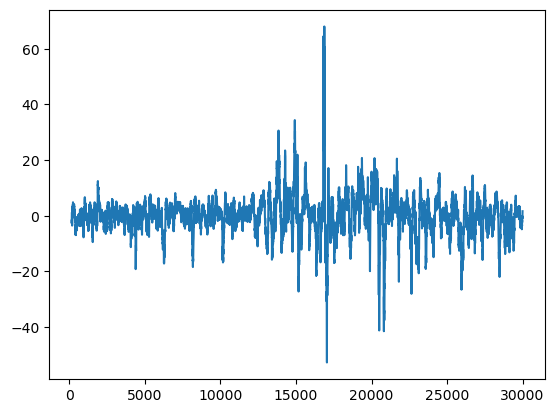

In [383]:
((df_1_squink.mid_price - df_1_squink.mid_price.rolling(50).mean())).plot()

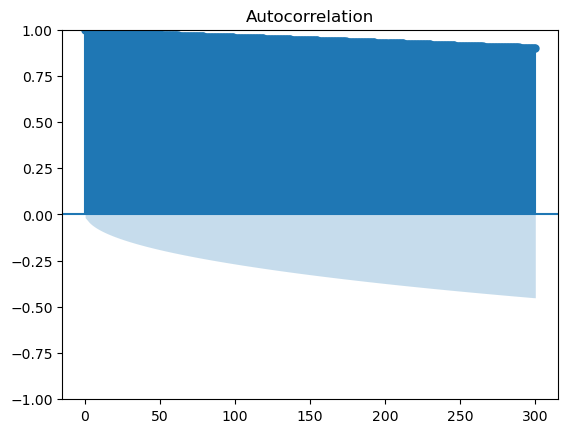

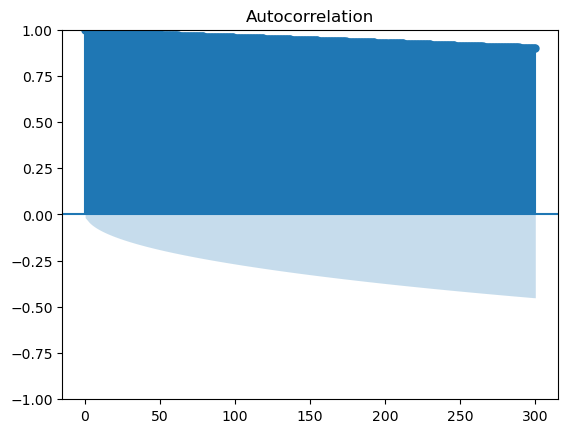

In [384]:
plot_acf(df_1_squink.mid_price, lags = 300)

# Kalman FIlter

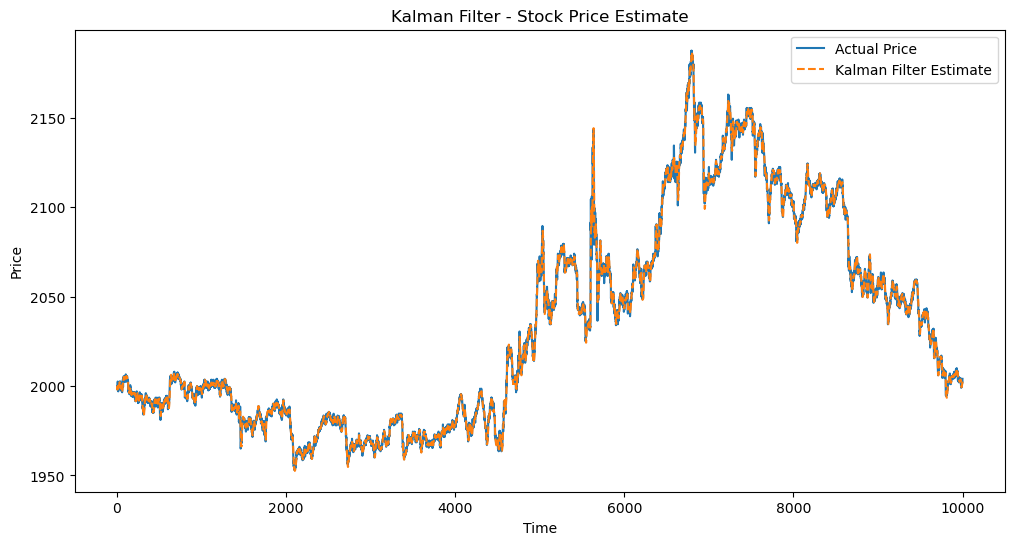

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical stock price
prices = df_1_squink.mid_price.values

# Initialize variables
n = len(prices)
predicted_price = np.zeros(n)
velocity = np.zeros(n)

# Initial guesses
predicted_price[0] = prices[0]
velocity[0] = 0

# Define noise parameters
process_variance = 1e-3
measurement_variance = 1  # Measurement noise
estimate_variance = 1.0

# Initial error covariance
P = np.eye(2)

# State vector [price, velocity]
x = np.array([prices[0], 0])

# State transition matrix
F = np.array([[1, 1],
              [0, 1]])

# Measurement matrix
H = np.array([[1, 0]])

# Process noise covariance
Q = process_variance * np.eye(2)

# Measurement noise covariance
R = np.array([[measurement_variance]])

for t in range(1, n):
    # Predict
    x = F @ x
    P = F @ P @ F.T + Q

    # Measurement
    z = np.array([prices[t]])

    # Kalman Gain
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)

    # Update estimate
    y = z - H @ x
    x = x + K.flatten() * y
    P = (np.eye(2) - K @ H) @ P

    predicted_price[t] = x[0]
    velocity[t] = x[1]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Price')
plt.plot(predicted_price, label='Kalman Filter Estimate', linestyle='--')
plt.legend()
plt.title('Kalman Filter - Stock Price Estimate')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


AttributeError: 'list' object has no attribute 'mean'

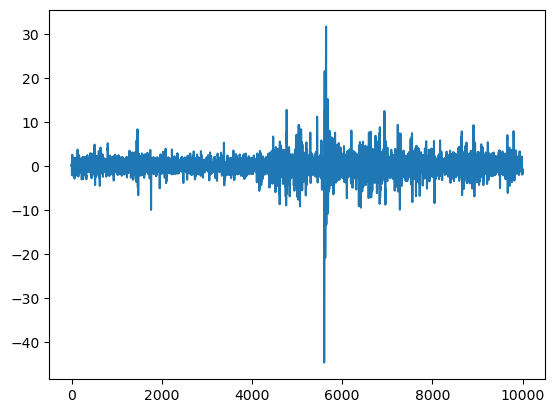

In [446]:
plt.plot((predicted_price - prices))

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 9.000e+00, 1.400e+01,
        3.600e+01, 6.700e+01, 2.000e+02, 7.560e+02, 2.916e+03, 3.970e+03,
        1.453e+03, 3.370e+02, 1.290e+02, 3.900e+01, 3.400e+01, 5.000e+00,
        9.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-44.72308778, -43.19341729, -41.6637468 , -40.13407631,
        -38.60440582, -37.07473534, -35.54506485, -34.01539436,
        -32.48572387, -30.95605338, -29.4263829 , -27.89671241,
        -26.36704192, -24.83737143, -23.30770094, -21.77803046,
        -20.24835997, -18.71868948, -17.18901899, -15.6593485 ,
        -14.12967801, -12.60000753, -11.07033704,  -9.54

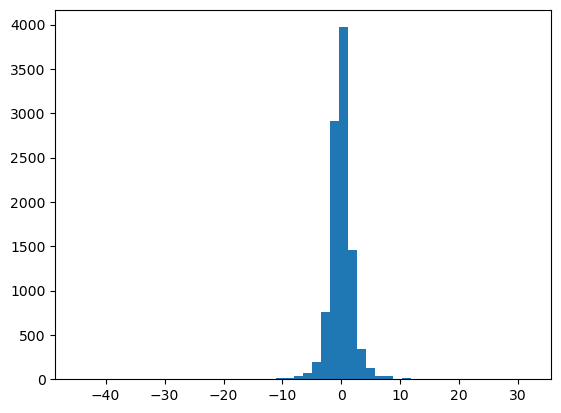

In [448]:
plt.hist((predicted_price - prices), bins = 50)

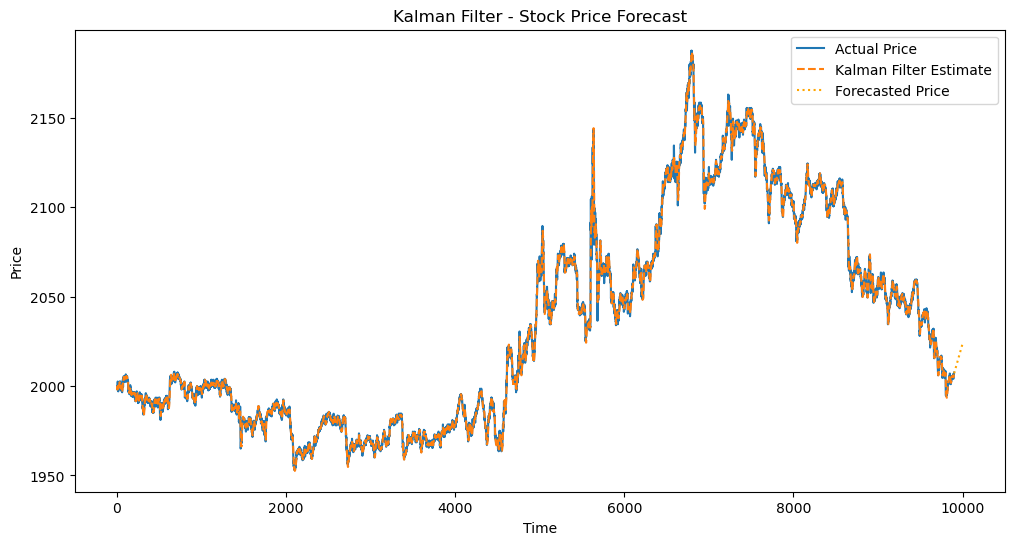

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical stock price
data = df_1_squink.mid_price[:-100]
prices = data.values

# Initialize variables
n = len(prices)
predicted_price = np.zeros(n)
velocity = np.zeros(n)

predicted_price[0] = prices[0]
velocity[0] = 0

# Define noise parameters
process_variance = 1e-3
measurement_variance = 1

P = np.eye(2)
x = np.array([prices[0], 0])  # Initial state: [price, velocity]

F = np.array([[1, 1],
              [0, 1]])  # State transition

H = np.array([[1, 0]])  # Observation matrix

Q = process_variance * np.eye(2)
R = np.array([[measurement_variance]])

# Kalman filtering (estimate current state)
for t in range(1, n):
    # Predict
    x = F @ x
    P = F @ P @ F.T + Q

    z = np.array([prices[t]])

    # Kalman Gain
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)

    # Update
    y = z - H @ x
    x = x + K.flatten() * y
    P = (np.eye(2) - K @ H) @ P

    predicted_price[t] = x[0]
    velocity[t] = x[1]

# Forecasting future steps
future_steps = 100
future_prices = []

# Start from last state estimate
x_future = x.copy()

for _ in range(future_steps):
    x_future = F @ x_future
    future_prices.append(x_future[0])  # Save predicted price

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(n), prices, label='Actual Price')
plt.plot(range(n), predicted_price, label='Kalman Filter Estimate', linestyle='--')
plt.plot(range(n, n + future_steps), future_prices, label='Forecasted Price', linestyle=':', color='orange')
plt.legend()
plt.title('Kalman Filter - Stock Price Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [457]:
df_1_squink.mid_price[-100:]

29700    2006.5
29705    2007.5
29708    2007.5
29710    2008.0
29712    2006.0
          ...  
29986    2001.5
29990    2002.5
29992    2003.0
29994    2003.0
29999    2004.0
Name: mid_price, Length: 100, dtype: float64

In [456]:
future_prices

[2007.0708857158788,
 2007.2377333533443,
 2007.4045809908098,
 2007.5714286282753,
 2007.7382762657408,
 2007.9051239032062,
 2008.0719715406717,
 2008.2388191781372,
 2008.4056668156027,
 2008.5725144530682,
 2008.7393620905336,
 2008.906209727999,
 2009.0730573654646,
 2009.23990500293,
 2009.4067526403956,
 2009.573600277861,
 2009.7404479153265,
 2009.907295552792,
 2010.0741431902575,
 2010.240990827723,
 2010.4078384651884,
 2010.574686102654,
 2010.7415337401194,
 2010.9083813775849,
 2011.0752290150504,
 2011.2420766525158,
 2011.4089242899813,
 2011.5757719274468,
 2011.7426195649123,
 2011.9094672023778,
 2012.0763148398432,
 2012.2431624773087,
 2012.4100101147742,
 2012.5768577522397,
 2012.7437053897052,
 2012.9105530271706,
 2013.0774006646361,
 2013.2442483021016,
 2013.411095939567,
 2013.5779435770326,
 2013.744791214498,
 2013.9116388519635,
 2014.078486489429,
 2014.2453341268945,
 2014.41218176436,
 2014.5790294018254,
 2014.745877039291,
 2014.9127246767564,
 2015